# Clustering overview
In unsupervised learning, we aren't trying to predict anything. Instead, we're finding patterns in data.

One of the main unsupervised learning techniques is called clustering. We use clustering when we're trying to explore a dataset, and understand the connections between the various rows and columns.

Clustering voting data of Senators is particularly interesting because it can expose patterns that go deeper than party affiliation.

In [2]:
import pandas as pd
votes = pd.read_csv("114_congress.csv")

# Exploring the data

In [3]:
print(votes["party"].value_counts())
print(votes.mean())

R    54
D    44
I     2
Name: party, dtype: int64
1     0.325
4     0.575
5     0.535
6     0.945
7     0.545
8     0.415
9     0.545
10    0.985
20    0.525
26    0.545
32    0.410
38    0.480
39    0.510
44    0.460
47    0.370
dtype: float64


# Distance between Senators
To find the distance between two rows, we can use Euclidean distance. The formula is:

- d = sqrt((q1-p1)**2 + (q2-p2)**2 + … +(qn-pn)**2)

To compute Euclidean distance in Python, we can use the euclidean_distances() method in the scikit-learn library. 

In [5]:
from sklearn.metrics.pairwise import euclidean_distances
print(euclidean_distances(votes.iloc[0,3:],votes.iloc[1,3:]))

[[ 1.73205081]]


/home/kyohei/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/kyohei/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


# Initial clustering
We'll use an algorithm called k-means clustering to split our data into clusters. k-means clustering uses Euclidean distance to form clusters of similar Senators.

The k-means algorithm will group Senators who vote similarly on bills together, in clusters. Each cluster is assigned a center, and the Euclidean distance from each Senator to the center is computed. 

The k-means algorithm requires us to specify the number of clusters upfront. Because we suspect that clusters will occur along party lines, and the vast majority of Senators are either Republicans or Democrats, we'll pick 2 for our number of clusters.

We'll use the KMeans class from scikit-learn to perform the clustering. Because we aren't predicting anything, there's no risk of overfitting, so we'll train our model on the whole dataset. After training, we'll be able to extract cluster labels that indicate what cluster each Senator belongs to.

We can initialize the model like this:

- kmeans_model = KMeans(n_clusters=2, random_state=1)

The above code will initialize the k-means model with 2 clusters, and a random state of 1 to allow for the same results to be reproduced whenever the algorithm is run.

We'll then be able to use the fit_transform() method to fit the model to votes and get the distance of each Senator to each cluster. The result will look like this:

In [6]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2,random_state=1)
senator_distances = kmeans_model.fit_transform(votes.iloc[:,3:])
print senator_distances

[[ 3.12141628  1.3134775 ]
 [ 2.6146248   2.05339992]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 1.43833966  2.96866004]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 0.31287498  3.30758755]
 [ 0.33960656  3.41651746]
 [ 3.27058526  0.96734144]
 [ 0.33960656  3.41651746]
 [ 3.34875646  0.53945585]
 [ 0.33960656  3.41651746]
 [ 1.18084816  3.12695614]
 [ 1.23852221  3.13536063]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 2.6146248   2.05339992]
 [ 0.58487332  3.31421108]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 3.56324683  0.93036231]
 [ 3.42004795  0.24198446]
 [ 1.73847904  2.82326711]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 0.58487332  3.31421108]
 [ 3.27058526  0.92088553]
 

# Exploring the clusters
We can use the Pandas method crosstab() to compute and display how many Senators from each party ended up in each cluster.

We can extract the cluster labels for each Senator from kmeans_model using kmeans_model.labels_, then we can make a table comparing these labels to votes["party"] with crosstab(). This will show us if the clusters tend to break down along party lines or not.

In [12]:
labels = kmeans_model.labels_
print(pd.crosstab(labels,votes['party']))

party   D  I   R
row_0           
0      41  2   0
1       3  0  54


# Exploring Senators in the wrong cluster
It looks like both of our clusters mostly broke down along party lines. The first cluster contains 41 Democrats, and both Independents. The second cluster contains 3 Democrats, and 54 Republicans. 

In [14]:
democratic_outliers = votes[(labels == 1) & (votes['party'] == 'D')]
print(democratic_outliers)

        name party state    1    4    5    6    7    8    9   10   20   26  \
42  Heitkamp     D    ND  0.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   
56   Manchin     D    WV  0.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0   
74      Reid     D    NV  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5   

     32   38   39   44   47  
42  0.0  1.0  0.0  0.0  0.0  
56  0.0  1.0  1.0  0.0  0.0  
74  0.5  0.5  0.5  0.5  0.5  


# Plotting out the clusters

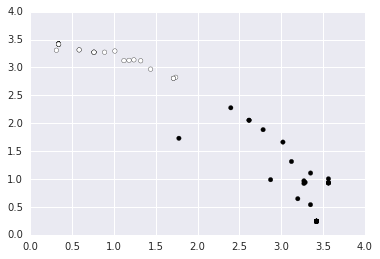

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.scatter(senator_distances[:,0],senator_distances[:,1],c=labels)
sns.plt.show()

# Finding the most extreme
The most extreme Senators are those who are the furthest away from one cluster. 

We cube the distances so that we can get a good amount of separation between the extremists who are farther away from a party

In [22]:
import numpy
extremism = numpy.sum(senator_distances ** 3,axis=1)
votes['extremism'] = extremism
votes.sort_values('extremism',ascending=False,inplace=True)
print(votes.head(10))

         name party state    1    4    5    6    7    8    9   10   20   26  \
98     Wicker     R    MS  0.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0   
53   Lankford     R    OK  0.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0   
69       Paul     R    KY  0.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0   
80      Sasse     R    NE  0.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0   
26       Cruz     R    TX  0.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0   
48    Johnson     R    WI  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0   
47    Isakson     R    GA  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0   
65  Murkowski     R    AK  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0   
64      Moran     R    KS  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0   
30       Enzi     R    WY  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0   

     32   38   39   44   47  extremism  
98  0.0  0.0  1.0  0.0  0.0  46.250476  
53  0.0  0.0  1.0  0.0  0.0  46.046873  
69  0.0